/root/miniconda3/envs/nota06/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Processing: /data/level4-cv-finalproject-hackathon-cv-21-lv3/data/audiocaps/test/103500.wav


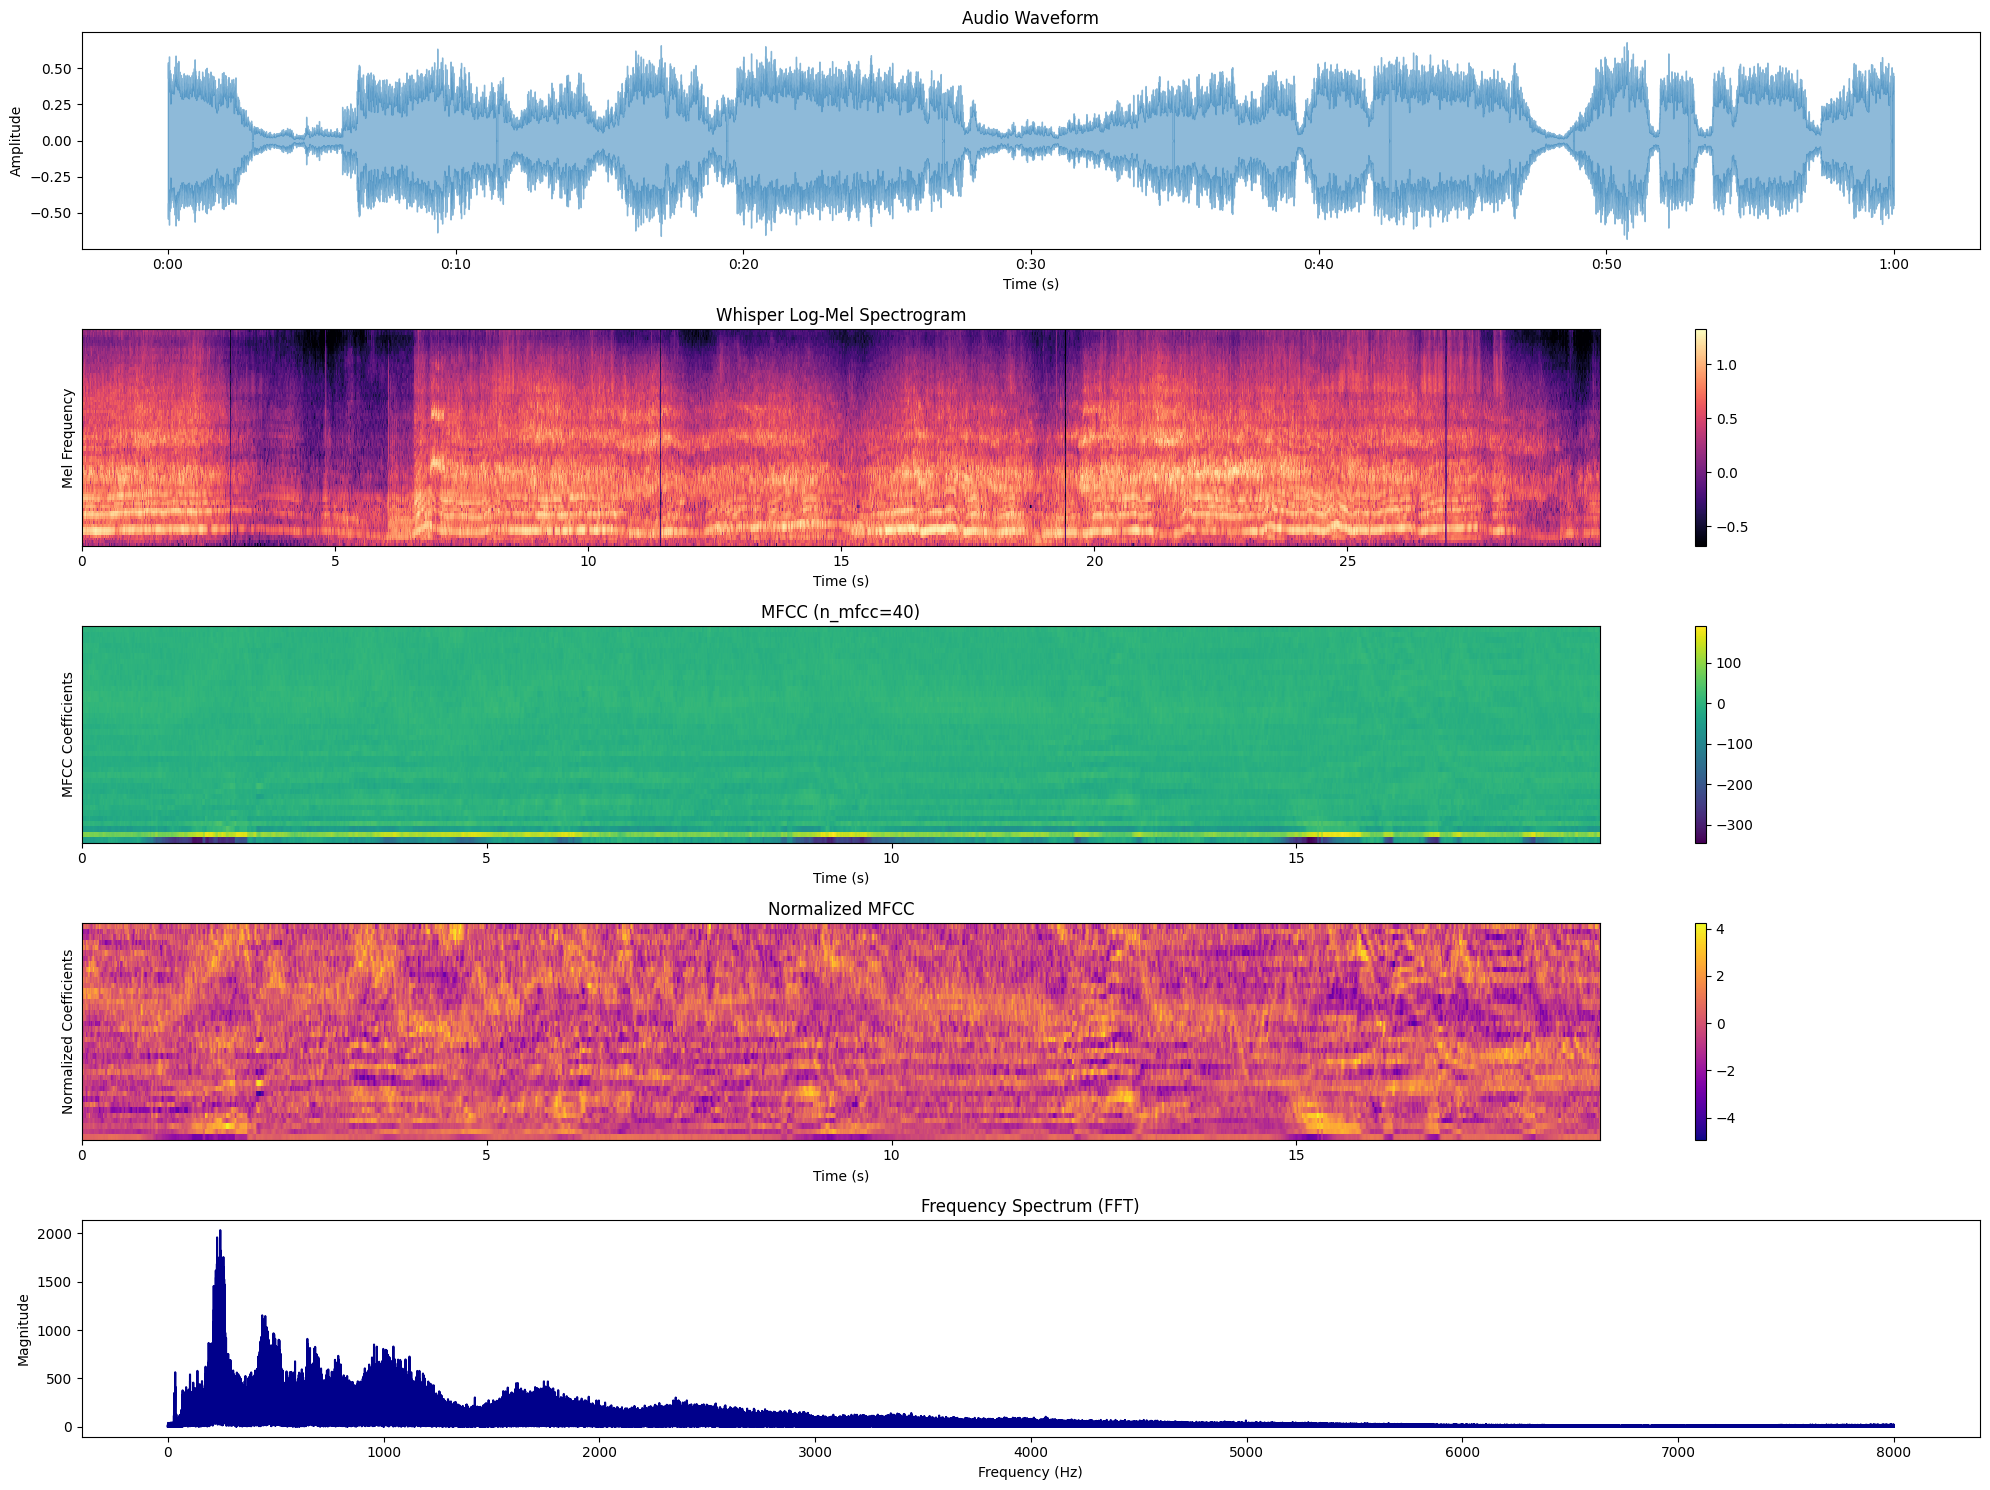

Processing: /data/level4-cv-finalproject-hackathon-cv-21-lv3/data/LibriSpeech/test-other/1688/142285/1688-142285-0032.flac


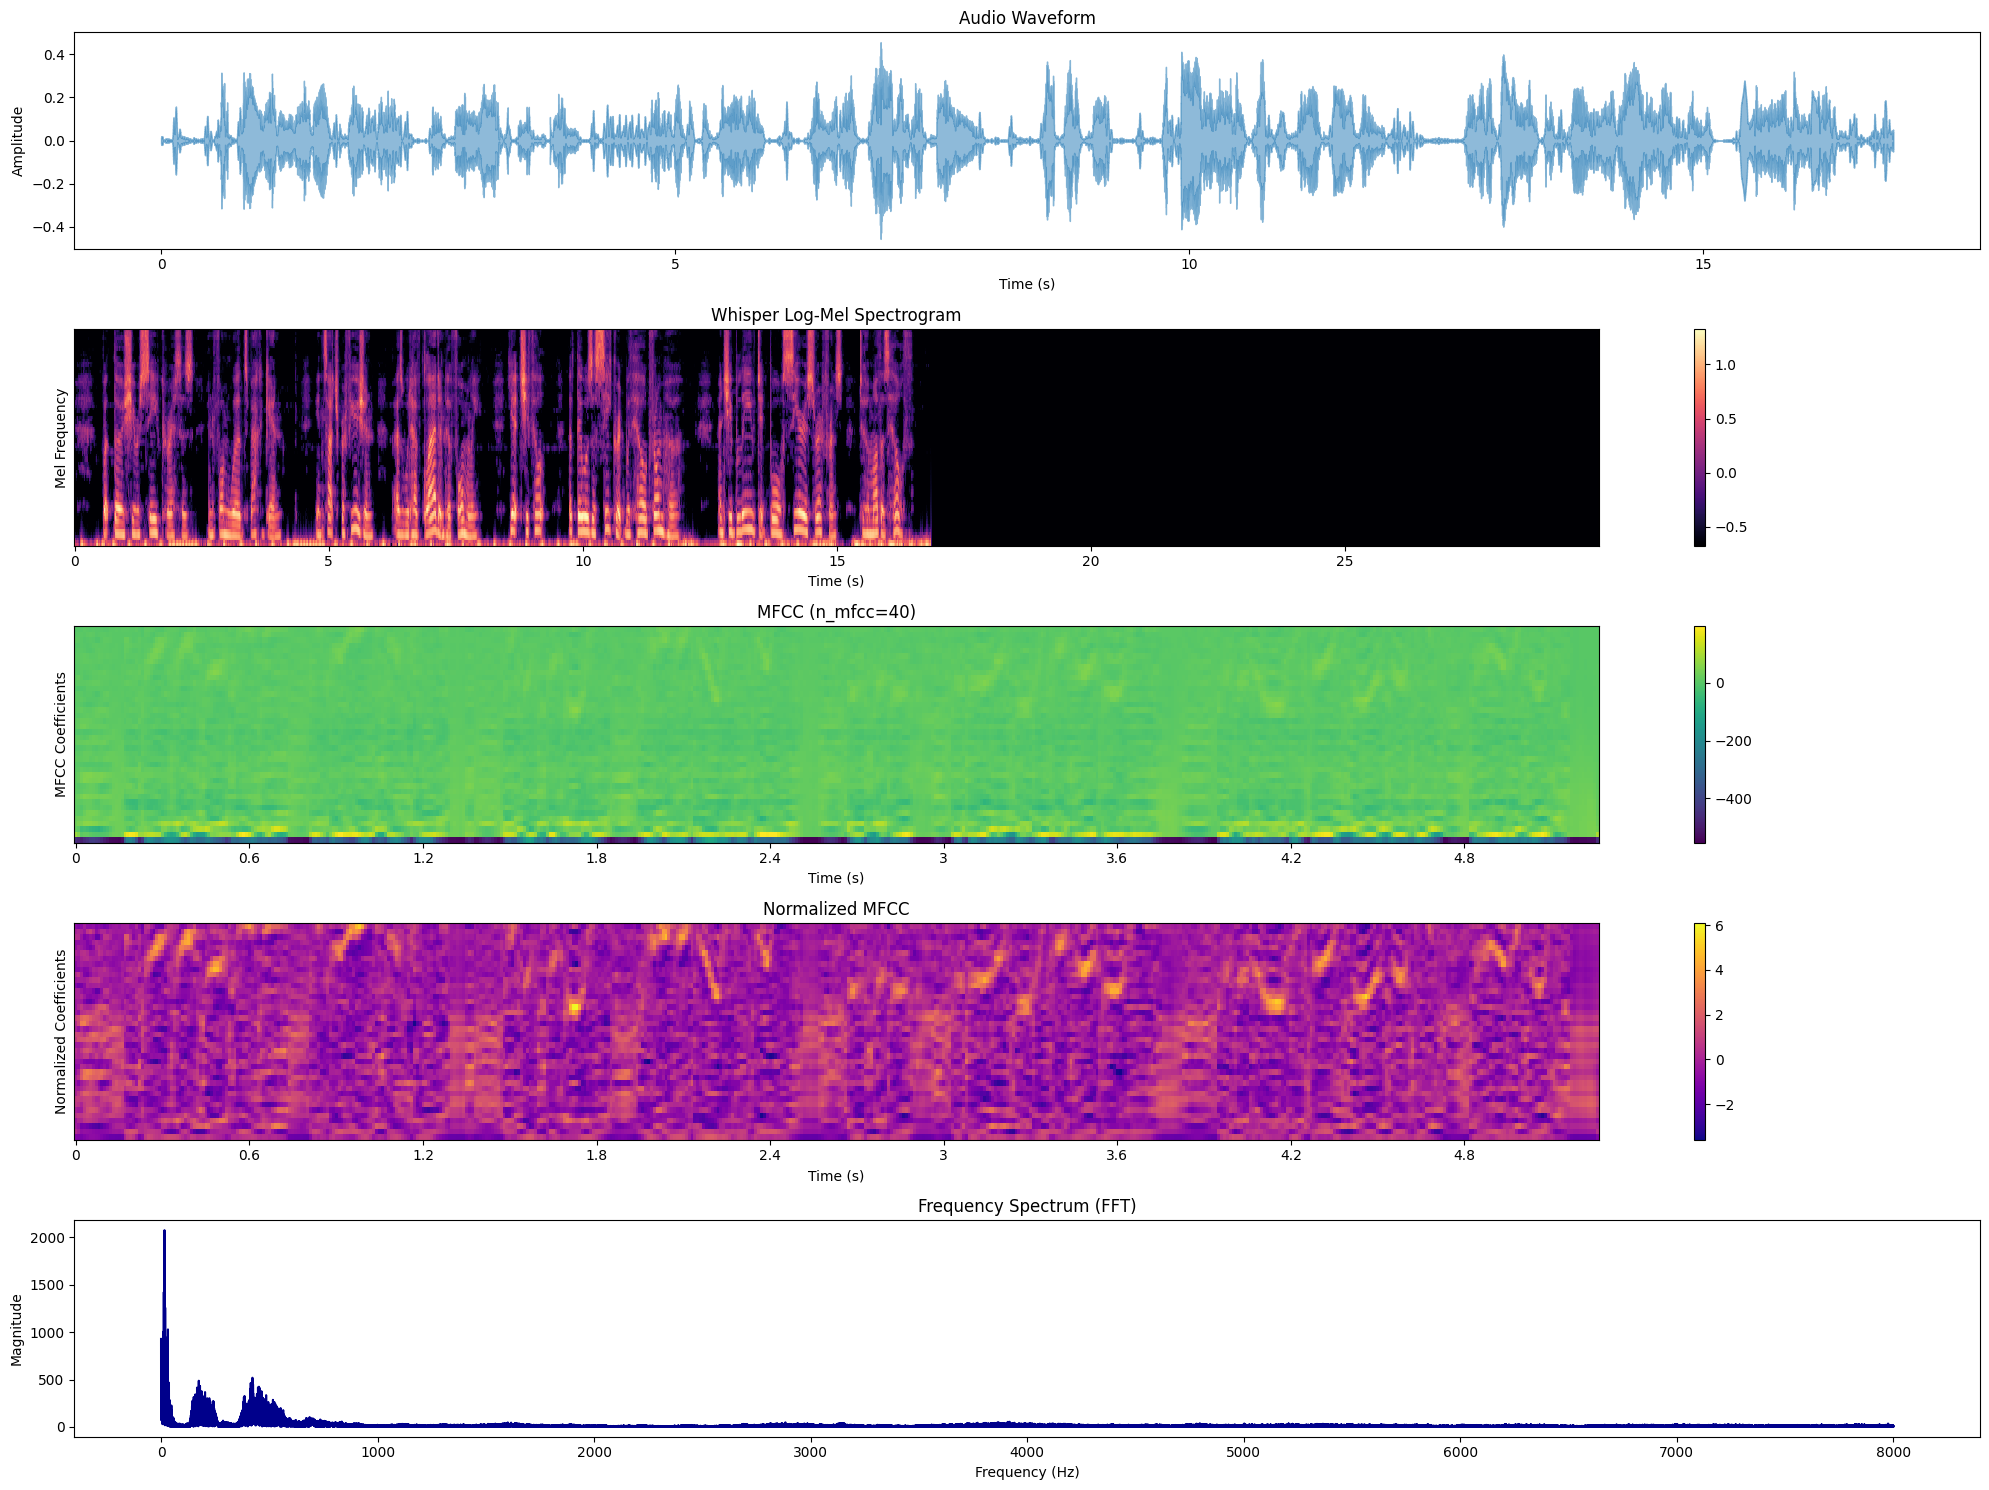

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from transformers import WhisperFeatureExtractor
import torch

def load_audio(audio_path, target_sr=16000):
    audio, sr = sf.read(audio_path)
    if len(audio.shape) == 2:  # Stereo to mono
        audio = audio.mean(axis=1)
    if sr != target_sr:  # Resample if needed
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    return audio, target_sr

def generate_whisper_spectrogram(audio, sr, whisper_model):
    processor = WhisperFeatureExtractor.from_pretrained(whisper_model)
    spectrogram = processor(audio, sampling_rate=sr, return_tensors="pt")[
        "input_features"
    ].squeeze(0).numpy()
    return spectrogram

def generate_mfcc(audio, sr, n_mfcc=40):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfcc

def normalize_mfcc(mfcc):
    return (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / (np.std(mfcc, axis=1, keepdims=True) + 1e-8)

def compute_fft(audio, sr):
    fft = np.fft.fft(audio)
    magnitude = np.abs(fft)
    frequency = np.fft.fftfreq(len(magnitude), 1 / sr)
    return frequency[: len(frequency) // 2], magnitude[: len(magnitude) // 2]

def plot_spectrograms(audio_path, whisper_model, n_mfcc=40):
    audio, sr = load_audio(audio_path)

    # Generate features
    whisper_spectrogram = generate_whisper_spectrogram(audio, sr, whisper_model)
    mfcc = generate_mfcc(audio, sr, n_mfcc=n_mfcc)
    normalized_mfcc = normalize_mfcc(mfcc)
    freq, magnitude = compute_fft(audio, sr)

    # Plotting
    plt.figure(figsize=(20, 15))

    # Original audio waveform
    plt.subplot(5, 1, 1)
    librosa.display.waveshow(audio, sr=sr, alpha=0.5)
    plt.title("Audio Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Whisper log-mel spectrogram
    plt.subplot(5, 1, 2)
    librosa.display.specshow(
        whisper_spectrogram, x_axis="time", sr=sr, hop_length=160, cmap="magma"
    )
    plt.colorbar()
    plt.title("Whisper Log-Mel Spectrogram")
    plt.xlabel("Time (s)")
    plt.ylabel("Mel Frequency")

    # MFCC
    plt.subplot(5, 1, 3)
    librosa.display.specshow(mfcc, x_axis="time", sr=sr, hop_length=160, cmap="viridis")
    plt.colorbar()
    plt.title(f"MFCC (n_mfcc={n_mfcc})")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")

    # Normalized MFCC
    plt.subplot(5, 1, 4)
    librosa.display.specshow(
        normalized_mfcc, x_axis="time", sr=sr, hop_length=160, cmap="plasma"
    )
    plt.colorbar()
    plt.title("Normalized MFCC")
    plt.xlabel("Time (s)")
    plt.ylabel("Normalized Coefficients")

    # Frequency Spectrum (FFT)
    plt.subplot(5, 1, 5)
    plt.plot(freq, magnitude, color="darkblue")
    plt.title("Frequency Spectrum (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    whisper_model = "openai/whisper-large-v2"
    audio_files = [
        "/data/level4-cv-finalproject-hackathon-cv-21-lv3/data/audiocaps/test/103500.wav",
        "/data/level4-cv-finalproject-hackathon-cv-21-lv3/data/LibriSpeech/test-other/1688/142285/1688-142285-0032.flac",
    ]

    for audio_file in audio_files:
        print(f"Processing: {audio_file}")
        plot_spectrograms(audio_file, whisper_model, n_mfcc=40)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from transformers import WhisperFeatureExtractor

def load_audio(audio_path, target_sr=16000):
    audio, sr = sf.read(audio_path)
    if len(audio.shape) == 2:  # Stereo to mono
        audio = audio.mean(axis=1)
    if sr != target_sr:  # Resample if needed
        audio = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    return audio, target_sr

def generate_whisper_spectrogram(audio, sr, whisper_model):
    processor = WhisperFeatureExtractor.from_pretrained(whisper_model)
    spectrogram = processor(audio, sampling_rate=sr, return_tensors="pt")[
        "input_features"
    ].squeeze(0).numpy()
    return spectrogram

def generate_mfcc(audio, sr, n_mfcc=40):
    return librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

def normalize_mfcc(mfcc):
    return (mfcc - np.mean(mfcc, axis=1, keepdims=True)) / (np.std(mfcc, axis=1, keepdims=True) + 1e-8)

def compute_fft(audio, sr):
    fft = np.fft.fft(audio)
    magnitude = np.abs(fft)
    frequency = np.fft.fftfreq(len(magnitude), 1 / sr)
    return frequency[: len(frequency) // 2], magnitude[: len(magnitude) // 2]

def plot_spectrograms(audio_files, whisper_model, n_mfcc=40):
    num_files = len(audio_files)
    fig, axs = plt.subplots(8, num_files, figsize=(16 * num_files, 40))  # Larger figure size for better readability

    for i, file in enumerate(audio_files):
        # Load audio
        audio, sr = load_audio(file)

        # Generate features
        whisper_spectrogram = generate_whisper_spectrogram(audio, sr, whisper_model)
        mfcc_audio = generate_mfcc(audio, sr, n_mfcc=n_mfcc)
        mfcc_whisper = generate_mfcc(whisper_spectrogram.flatten(), sr, n_mfcc=n_mfcc)
        normalized_mfcc_audio = normalize_mfcc(mfcc_audio)
        normalized_mfcc_whisper = normalize_mfcc(mfcc_whisper)
        freq, magnitude = compute_fft(audio, sr)

        # Audio Waveform
        axs[0, i].plot(np.linspace(0, len(audio) / sr, len(audio)), audio, color="blue")
        axs[0, i].set_title(f"Audio Waveform - {file}")
        axs[0, i].set_xlabel("Time (s)")
        axs[0, i].set_ylabel("Amplitude")

        # Frequency Spectrum (FFT)
        axs[1, i].plot(freq, magnitude, color="blue")
        axs[1, i].set_title("Frequency Spectrum (FFT)")
        axs[1, i].set_xlabel("Frequency (Hz)")
        axs[1, i].set_ylabel("Magnitude")

        # Chroma Features
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        img1 = librosa.display.specshow(chroma, sr=sr, x_axis="time", cmap="coolwarm", ax=axs[2, i])
        axs[2, i].set_title("Chroma Features")
        fig.colorbar(img1, ax=axs[2, i])

        # Whisper log-mel spectrogram
        img2 = librosa.display.specshow(whisper_spectrogram, x_axis="time", sr=sr, cmap="magma", ax=axs[3, i])
        axs[3, i].set_title("Whisper Log-Mel Spectrogram")
        fig.colorbar(img2, ax=axs[3, i])

        # MFCC from audio
        img3 = librosa.display.specshow(mfcc_audio, sr=sr, x_axis="time", cmap="viridis", ax=axs[4, i])
        axs[4, i].set_title("MFCC from Audio")
        fig.colorbar(img3, ax=axs[4, i])

        # MFCC from Whisper Spectrogram
        img4 = librosa.display.specshow(mfcc_whisper, sr=sr, x_axis="time", cmap="plasma", ax=axs[5, i])
        axs[5, i].set_title("MFCC from Whisper Spectrogram")
        fig.colorbar(img4, ax=axs[5, i])

        # Normalized MFCC from audio
        img5 = librosa.display.specshow(normalized_mfcc_audio, sr=sr, x_axis="time", cmap="viridis", ax=axs[6, i])
        axs[6, i].set_title("Normalized MFCC from Audio")
        fig.colorbar(img5, ax=axs[6, i])

        # Normalized MFCC from Whisper Spectrogram
        img6 = librosa.display.specshow(normalized_mfcc_whisper, sr=sr, x_axis="time", cmap="plasma", ax=axs[7, i])
        axs[7, i].set_title("Normalized MFCC from Whisper Spectrogram")
        fig.colorbar(img6, ax=axs[7, i])

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    whisper_model = "openai/whisper-large-v2"
    audio_files = [
        "103500.wav",
        "1688-142285-0032.flac",
    ]

    plot_spectrograms(audio_files, whisper_model, n_mfcc=40)


/root/miniconda3/envs/nota06/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
